In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
toyota_cor_data = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [3]:

toyota_cor_data.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [4]:
#selecting only those columns mentioned in problem statement and creating new data frame
toyoto_new_data = toyota_cor_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
toyoto_new_data.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [6]:
toyoto_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
toyoto_new_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
toyoto_new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [9]:
toyoto_new_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


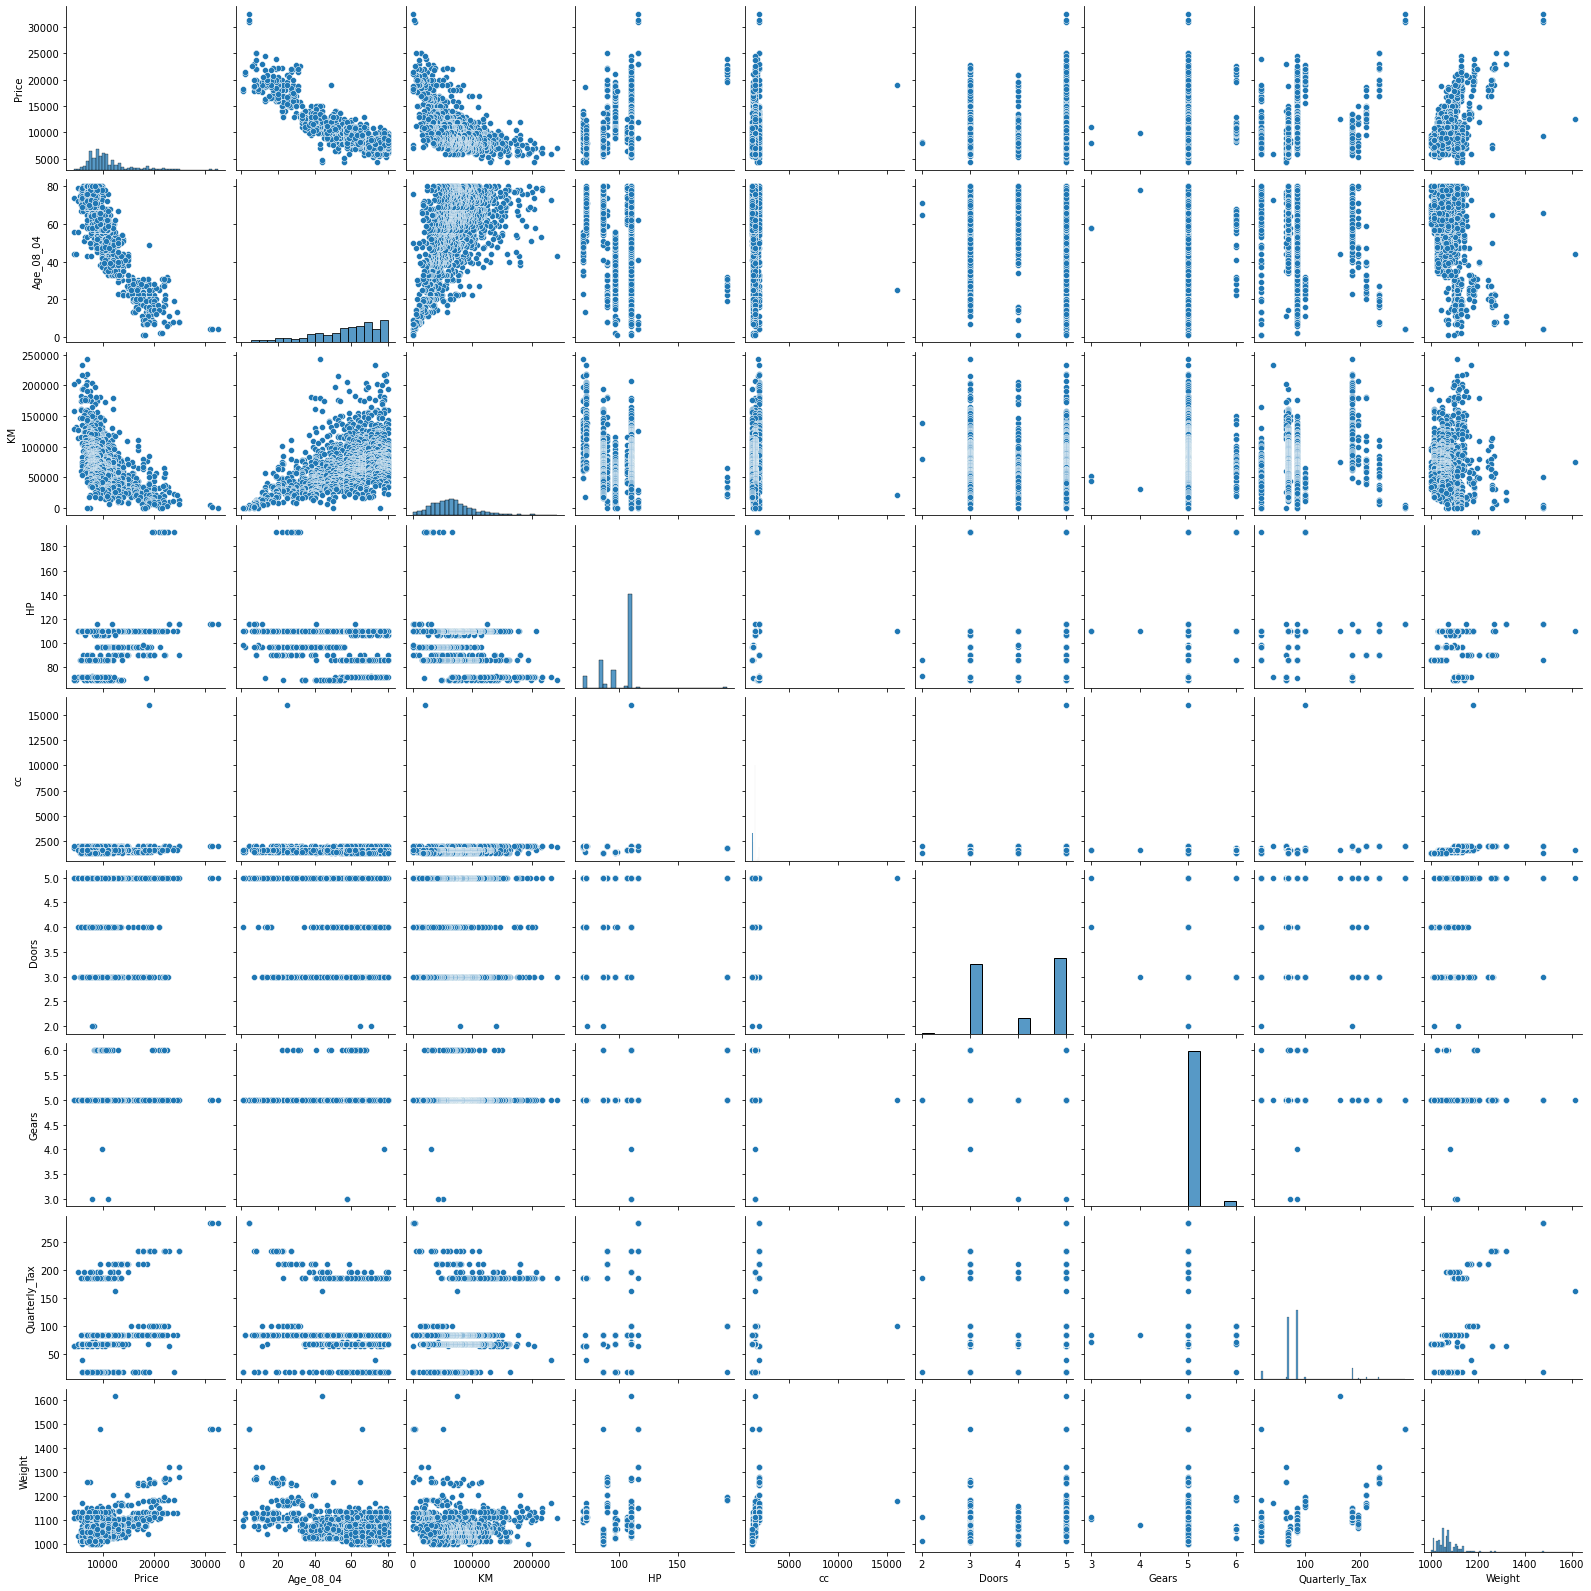

In [10]:
sns.pairplot(toyoto_new_data)

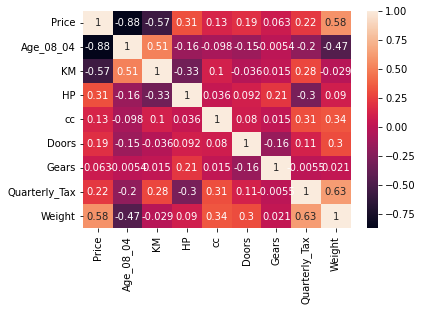

In [11]:
sns.heatmap(toyoto_new_data.corr(),annot=True)
plt.show()

In [12]:
#Renaming Columns ,converting in lower case and shorter form
toyoto_new_data.rename(columns={'Price':'price','Age_08_04':'age','KM':'km','HP':'hp',
                                    'Doors':'doors','Gears':'gears','Quarterly_Tax':'q_tax','Weight':'weight'},inplace=True)    
toyoto_new_data.head()

C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_5476\3605431301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyoto_new_data.rename(columns={'Price':'price','Age_08_04':'age','KM':'km','HP':'hp',


,price,age,km,hp,cc,doors,gears,q_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Preparing Model 

In [13]:
toyota_model = smf.ols('price~age+km+hp+cc+doors+gears+q_tax+weight',data=toyoto_new_data).fit()

In [14]:
toyota_model.params

Intercept   -5573.106358
age          -121.658402
km             -0.020817
hp             31.680906
cc             -0.121100
doors          -1.616641
gears         594.319936
q_tax           3.949081
weight         16.958632
dtype: float64

In [15]:
#t and p-Values
print(toyota_model.tvalues, '\n', toyota_model.pvalues)

Intercept    -3.948666
age         -46.511852
km          -16.621622
hp           11.241018
cc           -1.344222
doors        -0.040410
gears         3.016007
q_tax         3.014535
weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
age          3.354724e-288
km            7.538439e-57
hp            3.757218e-28
cc            1.790902e-01
doors         9.677716e-01
gears         2.606549e-03
q_tax         2.619148e-03
weight        2.048576e-52
dtype: float64


In [16]:
toyota_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:33:08   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears        594.3199    197.055      3.016      0.003     207.771     980.869
q_tax          3.9491      1.310      3.015      0.003       1.379       6.519
weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models.

In [17]:
#as per p-values cc and door are not significant ,so we further investigate about these variables
ml_cc =smf.ols('price~cc',data=toyoto_new_data).fit()
#p-value and t-value 
print(ml_cc.tvalues,'\n',ml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [18]:
ml_doors=smf.ols('price~doors',data=toyoto_new_data).fit()
#p-value and t-value 
print(ml_doors.tvalues,'\n',ml_doors.pvalues)

Intercept    19.258097
doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
doors        1.461237e-12
dtype: float64


In [19]:
ml_cc_doors=smf.ols('price~cc+doors',data=toyoto_new_data).fit()
#p-value and t-value 
print(ml_cc_doors.tvalues,'\n',ml_cc_doors.pvalues)

Intercept    12.620704
cc            4.340400
doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
doors        1.373469e-11
dtype: float64


# Calculating VIF 

In [20]:
rsq_age= smf.ols('age~km+hp+cc+doors+gears+q_tax+weight',
                       data=toyoto_new_data).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('km~age+hp+cc+doors+gears+q_tax+weight',
                       data=toyoto_new_data).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('hp~age+km+cc+doors+gears+q_tax+weight',
                       data=toyoto_new_data).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc= smf.ols('cc~age+km+hp+doors+gears+q_tax+weight',
                       data=toyoto_new_data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors= smf.ols('doors~cc+age+km+hp+gears+q_tax+weight',
                       data=toyoto_new_data).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears= smf.ols('gears~cc+age+km+hp+doors+q_tax+weight',
                       data=toyoto_new_data).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_q_tax= smf.ols('q_tax~km+gears+cc+age+km+hp+doors+weight',
                       data=toyoto_new_data).fit().rsquared
vif_q_tax = 1/(1-rsq_q_tax)

rsq_weight= smf.ols('weight~gears+cc+age+km+hp+doors+q_tax',
                       data=toyoto_new_data).fit().rsquared
vif_weight = 1/(1-rsq_weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','Quaterly Tax','Weight'],
          'VIF':[vif_age,vif_cc,vif_doors,vif_gears,vif_hp,vif_km,vif_q_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.163894
2,HP,1.156575
3,CC,1.098723
4,Doors,1.419422
5,Gears,1.756905
6,Quaterly Tax,2.311431
7,Weight,2.516420


In [21]:
#None of the variable has VIF>20 so no multicollinearity found

# Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

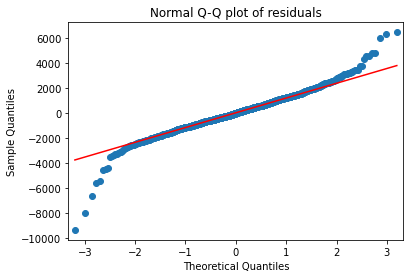

In [22]:
import statsmodels.api as sm


qqplot=sm.qqplot(toyota_model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(toyota_model.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [24]:
list(np.where(toyota_model.resid<-5000))

[array([191, 192, 221, 601, 960], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

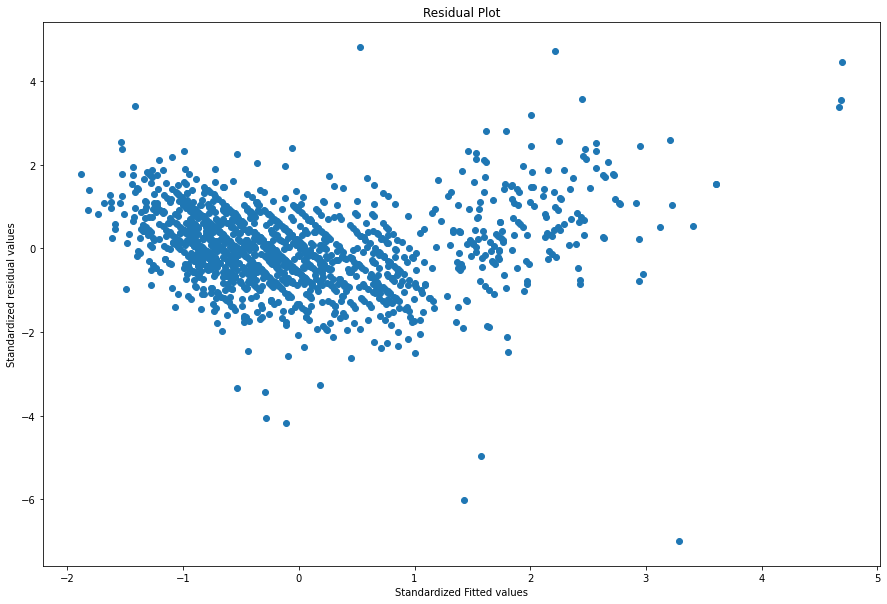

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(toyota_model.fittedvalues),
            get_standardized_values(toyota_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressors

eval_env: 1


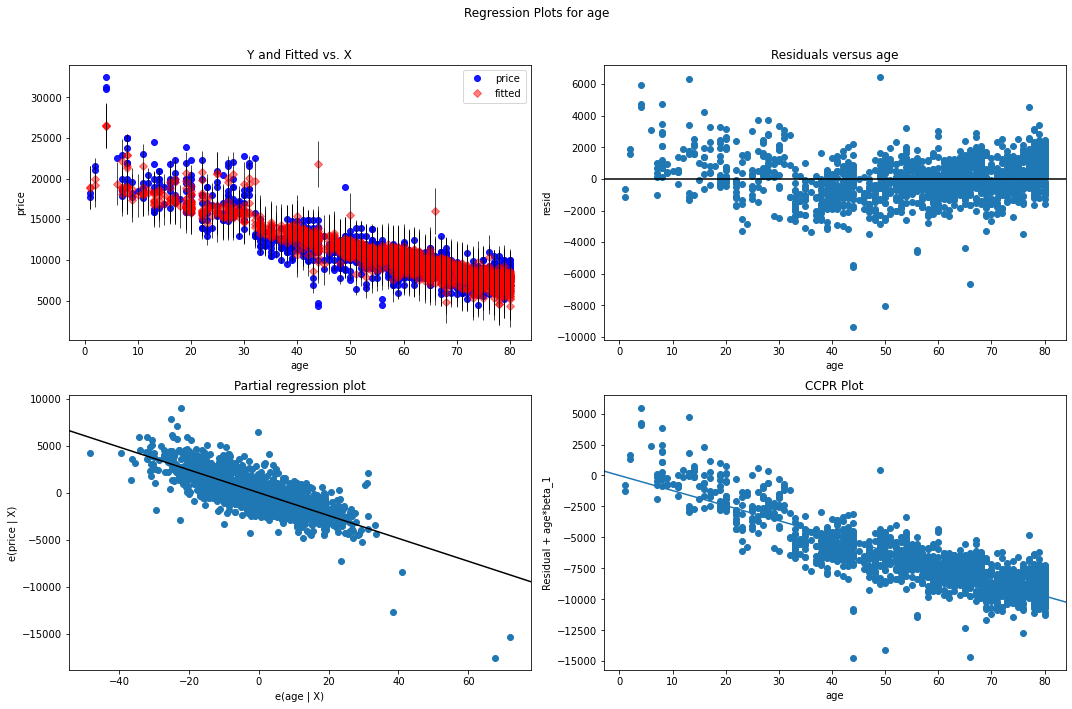

In [27]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'age', fig=fig)
plt.show()

eval_env: 1


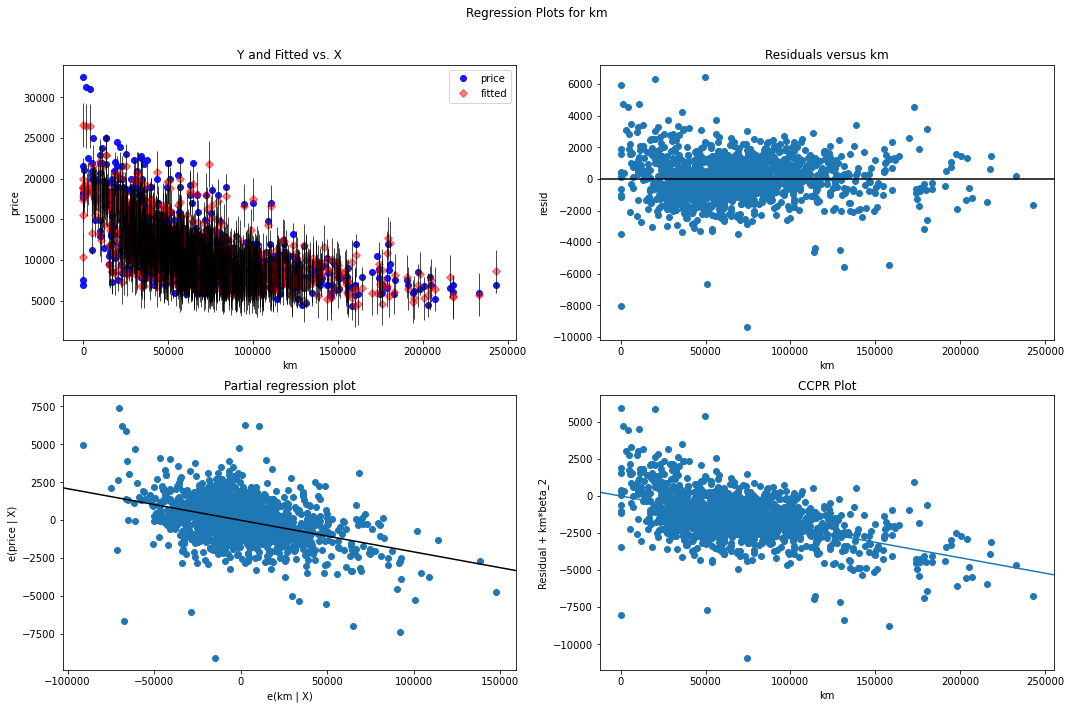

In [28]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'km', fig=fig)
plt.show()

eval_env: 1


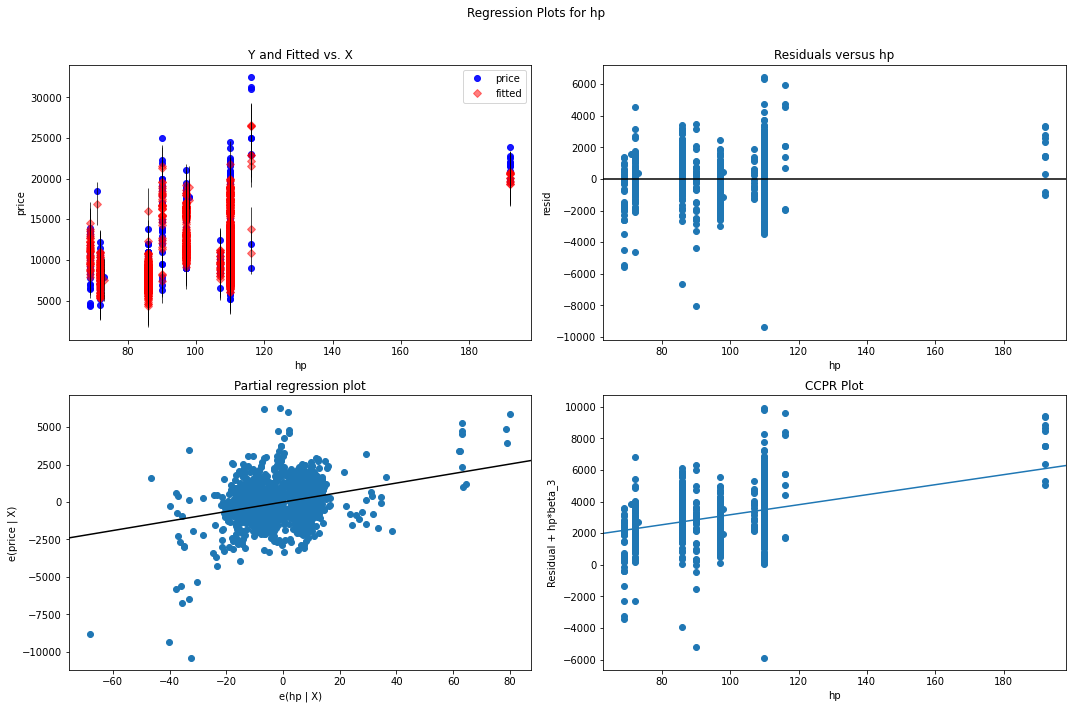

In [29]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'hp', fig=fig)
plt.show()

eval_env: 1


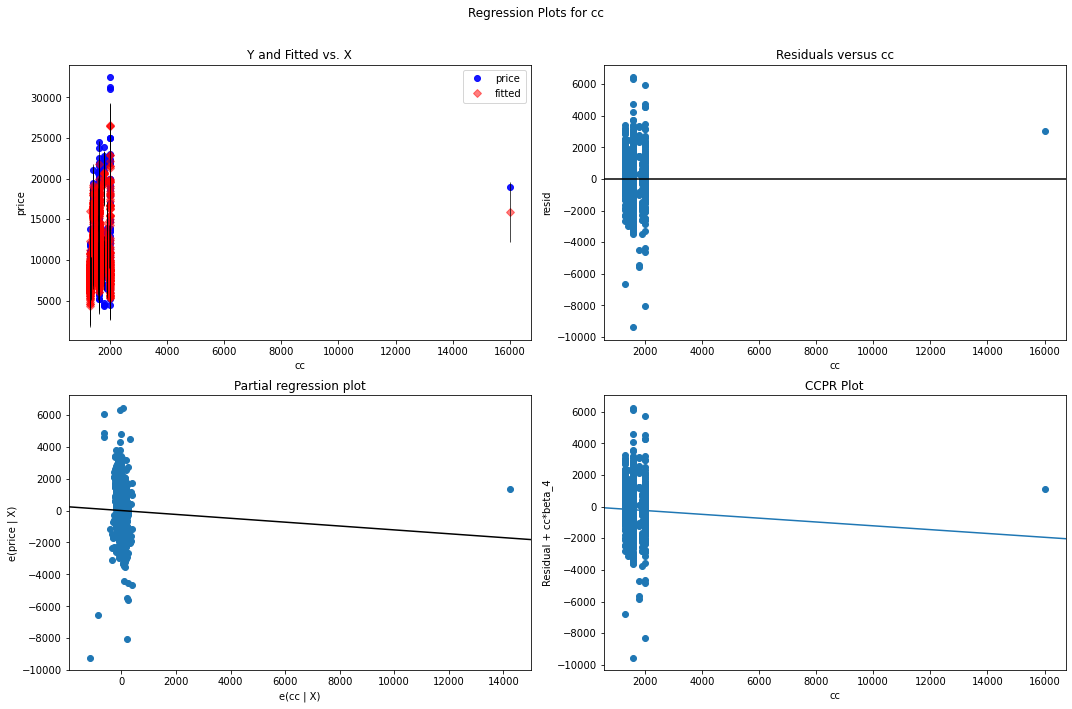

In [30]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'cc', fig=fig)
plt.show()

eval_env: 1


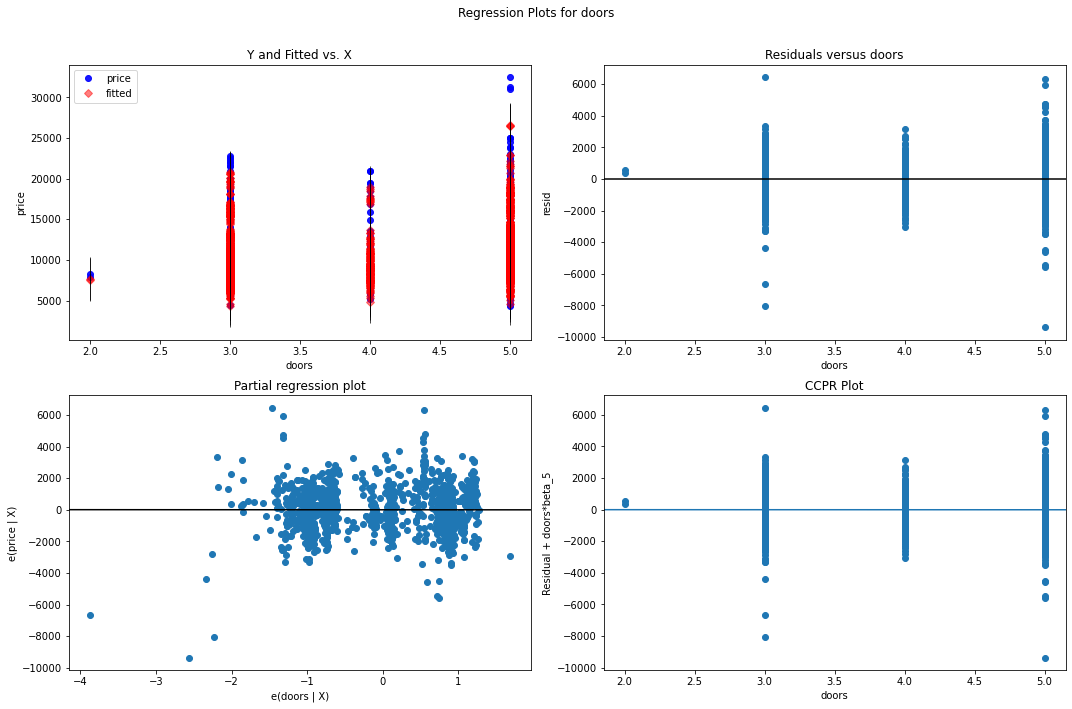

In [31]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'doors', fig=fig)
plt.show()

eval_env: 1


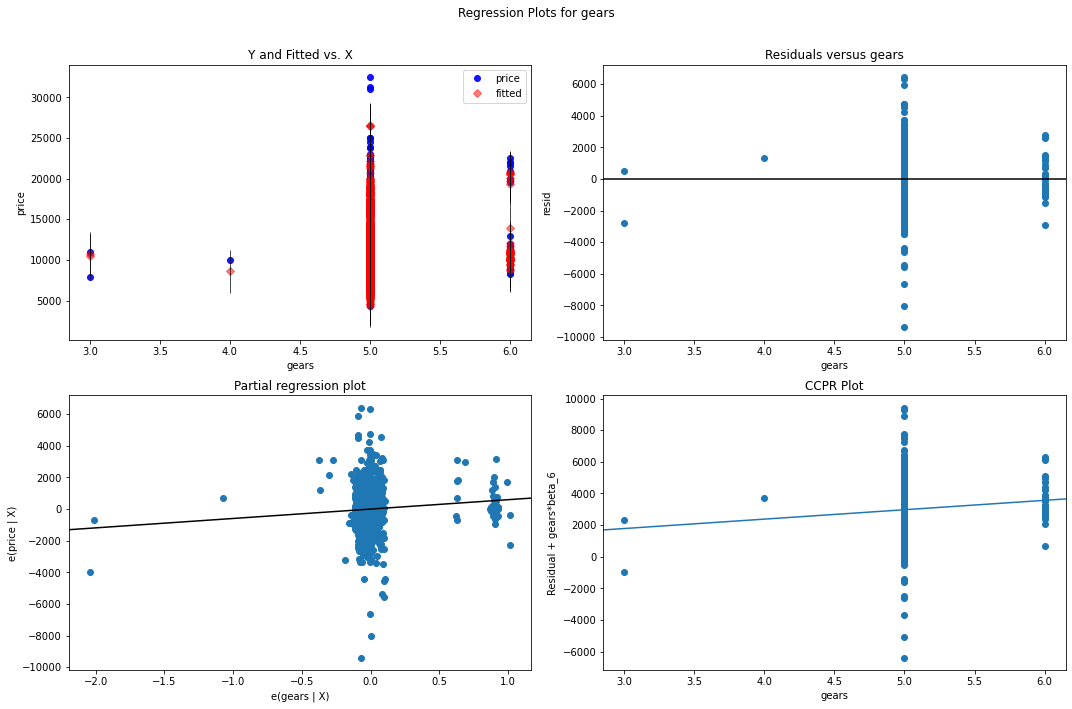

In [32]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'gears', fig=fig)
plt.show()

eval_env: 1


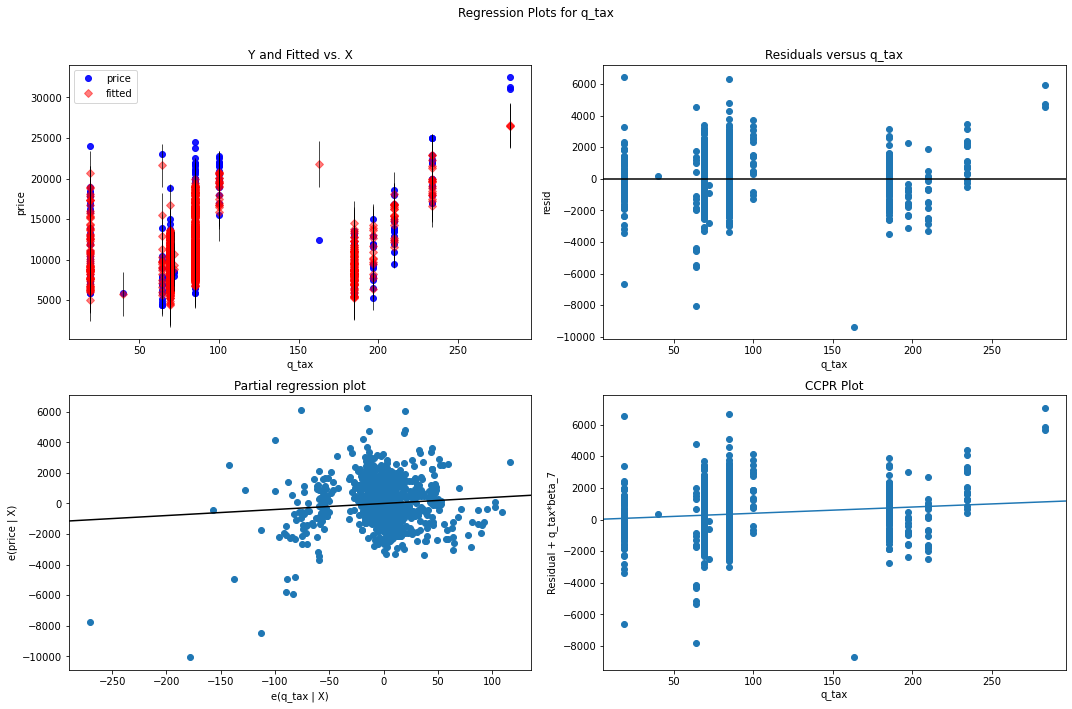

In [33]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'q_tax', fig=fig)
plt.show()

eval_env: 1


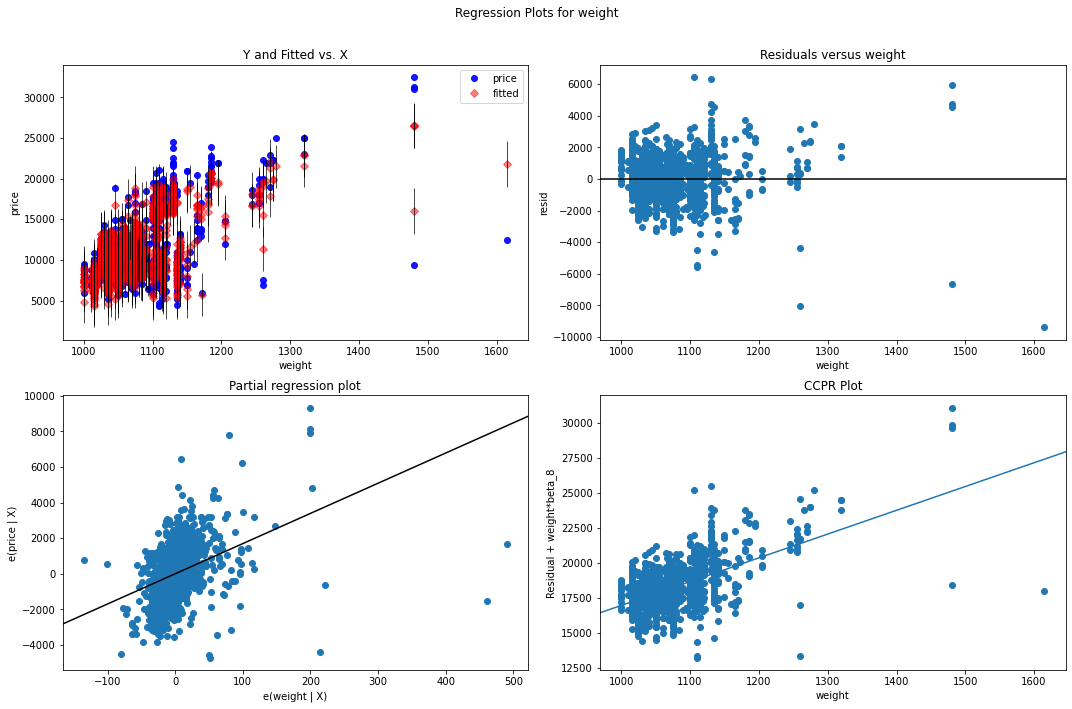

In [34]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(toyota_model,'weight', fig=fig)
plt.show()

# Model Deletion Diagnostics

# Cook's Distance

In [35]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = toyota_model.get_influence()
(c, _) = model_influence.cooks_distance

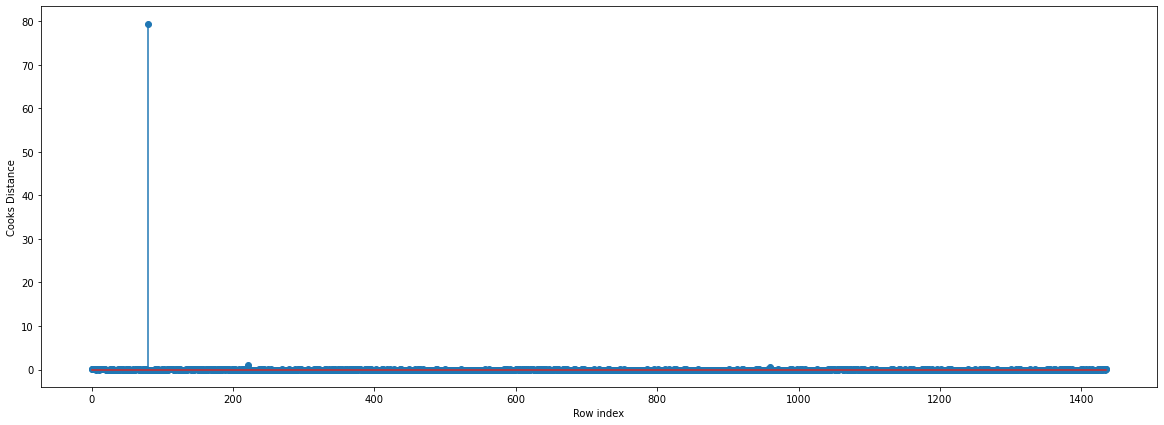

In [36]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyoto_new_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

# High Influence Points

In [38]:
toyoto_new_data.shape

(1436, 9)

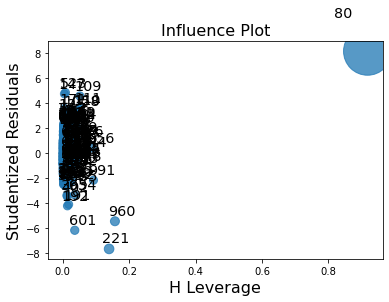

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(toyota_model)
plt.show()

In [40]:
k = toyoto_new_data.shape[1]
n = toyoto_new_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [41]:
toyoto_new_data[toyoto_new_data.index.isin([80,601,221,960])]

,price,age,km,hp,cc,doors,gears,q_tax,weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


In [42]:
toyoto_new_data.head()

,price,age,km,hp,cc,doors,gears,q_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [43]:
toyoto_new_data[toyoto_new_data['q_tax']<30]

,price,age,km,hp,cc,doors,gears,q_tax,weight
18,16750,24,25563,110,1600,3,5,19,1065
30,12950,29,9750,97,1400,3,5,19,1100
65,16950,26,32181,110,1600,5,5,19,1075
126,15950,20,36000,110,1600,5,5,19,1075
129,15850,13,33477,110,1600,5,5,19,1075
...,...,...,...,...,...,...,...,...,...
1387,7450,78,52287,110,1600,5,5,19,1114
1388,8750,75,52000,110,1600,5,5,19,1075
1416,8950,79,40093,110,1600,5,5,19,1114
1423,7950,80,35821,86,1300,3,5,19,1015


In [44]:
toyoto_new_data[(toyoto_new_data['km']<10) & (toyoto_new_data['age']>10) ]

,price,age,km,hp,cc,doors,gears,q_tax,weight
601,7500,50,1,90,2000,3,5,64,1260
1435,6950,76,1,110,1600,5,5,19,1114


In [45]:
toyoto_new_data[toyoto_new_data['doors']==3]

,price,age,km,hp,cc,doors,gears,q_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,8450,80,23000,86,1300,3,5,69,1015
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015


In [46]:
toyoto_new_data[toyoto_new_data['doors']>4]

,price,age,km,hp,cc,doors,gears,q_tax,weight
43,16950,27,110404,90,2000,5,5,234,1255
44,16950,22,100250,90,2000,5,5,234,1255
45,19000,23,84000,90,2000,5,5,234,1270
46,17950,27,79375,90,2000,5,5,234,1255
47,15800,22,75048,97,1400,5,5,85,1110
...,...,...,...,...,...,...,...,...,...
1411,7950,76,43532,110,1600,5,5,85,1070
1413,8750,74,42317,107,1600,5,5,85,1100
1416,8950,79,40093,110,1600,5,5,19,1114
1429,8950,78,24000,86,1300,5,5,85,1065


Now from above values we can observe that the 'cc' value of data at index 80 is quite high(16000>2000) than 
other values .For futher confirmatation we can check boxplot for 'cc'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cc'>

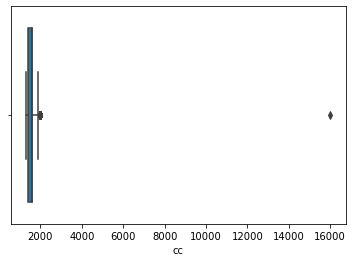

In [47]:
sns.boxplot(toyoto_new_data['cc'])

Now ,its confirmed that data point at index 80 is high influence point

# Improving the model

In [48]:
toyoto_backup = toyoto_new_data.copy()
toyoto_backup

,price,age,km,hp,cc,doors,gears,q_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [49]:
#Removing high influence data point at index 80
toyota_improv_model_1 = toyoto_new_data.drop(toyoto_new_data.index[[80]],axis=0).reset_index(drop=True)

In [50]:
toyota_improv_model_1

,price,age,km,hp,cc,doors,gears,q_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Final Model

In [51]:
toyota_final_model = smf.ols('price~age+km+hp+cc+doors+gears+q_tax+weight',data=toyota_improv_model_1).fit()

In [52]:
(toyota_model.rsquared,toyota_model.aic)

(0.8637627463428192, 24769.07664007625)

In [53]:
(toyota_final_model.rsquared,toyota_final_model.aic)

(0.8693790488655819, 24687.28102432684)

In [54]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = toyota_final_model.get_influence()
(c, _) = model_influence.cooks_distance

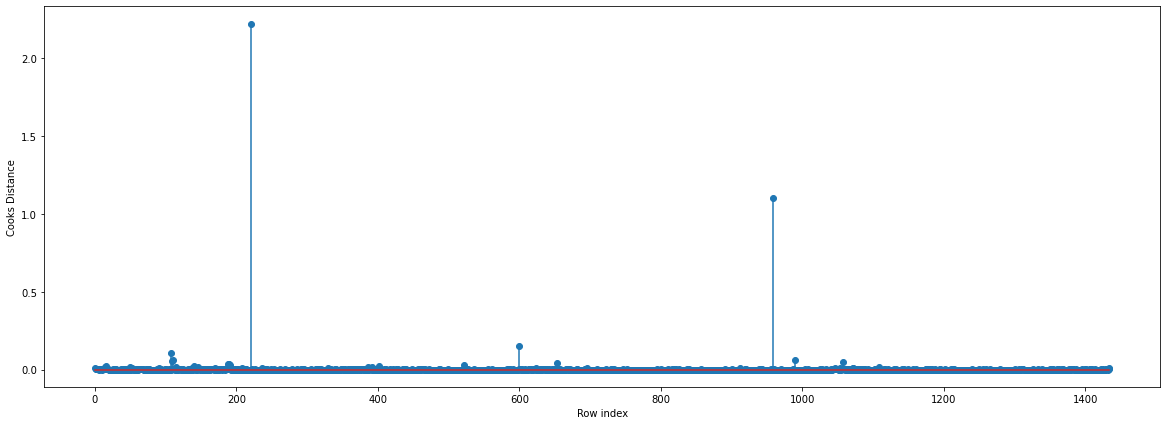

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_improv_model_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(220, 2.2244611713001508)

In [57]:
toyota_improv_model_1[c>1]

,price,age,km,hp,cc,doors,gears,q_tax,weight
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480


In [58]:
#Removing outliers at index 220 and 959

toyota_improv_model_2 = toyota_improv_model_1.drop(toyoto_new_data.index[[220,959]],axis=0).reset_index(drop=True)

In [59]:
toyota_improv_model_2.shape

(1433, 9)

In [60]:
toyota_final_model_2 = smf.ols('price~age+km+hp+cc+doors+gears+q_tax+weight',data=toyota_improv_model_2).fit()

In [61]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = toyota_final_model_2.get_influence()
(c, _) = model_influence.cooks_distance

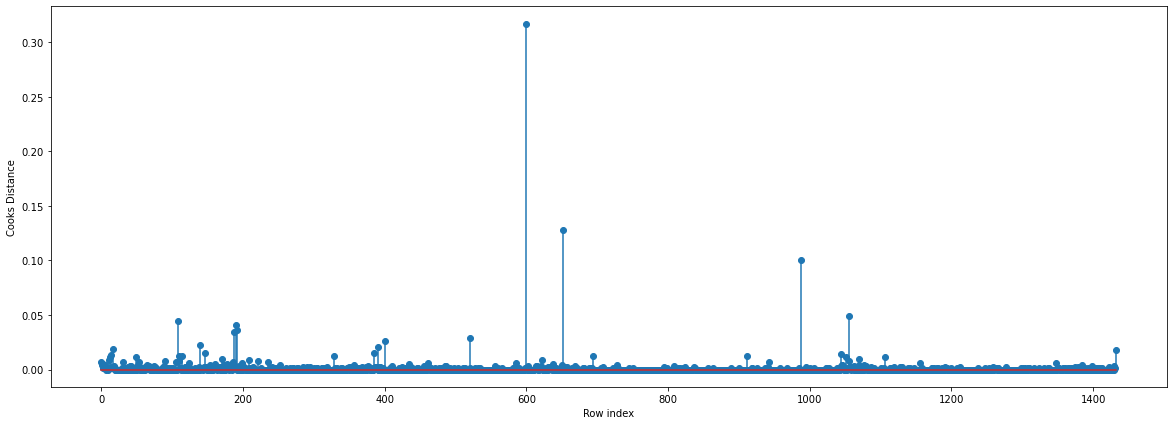

In [62]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_improv_model_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

Since now value is <1 we stop diagnosis here and finalize the model

In [63]:
#Check accurecy of model

In [64]:
(toyota_final_model_2.rsquared,toyota_final_model_2.aic)

(0.8851845904421739, 24469.715205158594)

# Predicting New Data

In [65]:
data_to_pred =pd.DataFrame({'age':24,'km':40000,'hp':90,'cc':2000,'doors':5,'gears':5,'q_tax':200,'weight':1200},index=[1])
data_to_pred

,age,km,hp,cc,doors,gears,q_tax,weight
1,24,40000,90,2000,5,5,200,1200


In [66]:
toyota_final_model_2.predict(data_to_pred)

1    17115.129147
dtype: float64